# 1. Overview

## 1.1. Basic concepts

### Nodes and edges
Going back to familiar binary Logistic Regression, we visualize, let's say, a model trained on the dataset having 3 features and a single label. On the graph, each feature/label ($\mathbf{x}$ or $\mathbf{y}$) is represented by a *node* and each model weight ($w_1,w_2,w_3$) is represented by a *colored edge*. The bias $w_0$ (or sometimes denoted $b$) is not showing on the graph, but keep in mind it is attached to the output node. This is the most basic architecture of a Neural Network with 4 parameters (3 weights + 1 bias).

<img src='image/mlp_linear_simple.png' style='height:180px; margin:20px auto;'>

### Layers
Now, we extend the problem to a Stacking model, where 5 base models and the meta model are all Logistic Regression. Beside an input layer and an output layer, there is a new layer between them, called the *hidden layer*. We can add more and more hidden layers for multilevel stacking design. By doing this, our Neural Network becomes *deeper* and can capture more complicated relationship in our data. This opens up a new branch of Machine Learning algorithms: Deep Learning.

<img src='image/mlp_linear_stacking.png' style='height:300px; margin:20px auto;'>

### Representation learning
In the two examples above, the Neural Network is designed for a binary classification problem, where the target is a vector storing the probabilities of being classified to the positive class. For a multi-class classification problem, we need to contruct a vector of probabilities for each class. Below is an example Neural Network architecture with 2 hidden layers for the Iris data which has 4 features and 3 classes.

<img src='image/mlp_iris.png' style='height:300px; margin:20px auto;'>

This type of architecture is generally called Deep Neural Network of Multilayer Perceptron. Notice that each node represents a vector, we can think of nodes in the hidden layers as *latent features*, as they are automatically discovered by Deep Neural Networks. Such an approach is called [representation learning], one of the benefits that Multilayer Perceptron offer.

[representation learning]: https://en.wikipedia.org/wiki/Feature_learning

### Inspiration
Now we have known what a Deep Neural Network is, but what does the term *neural* implies here? This is because Neural Nets are inspired by biological neural network that constitute human brains. Artificial Neural Networks are constructed by nodes and edges, which resemble *neurons* and *synapses* in biological brains. An artificial neuron recieves signals, processes them and transmit it to other neurons. The strength of a signal between neurons is modeled by the weight of an edge.

Biological nervous system in fact is much more complicated, and Artificial Neural Network is just a simple counterpart.

### Architecture
The first thing to notice when constructing a Neural Network is the shape of each layer. Let's take a look at the first hidden layer: it has the shape of (None, 6). This means, this layer is a matrix with 6 columns and an unspecified number of rows. In other words, the architecture of the Neural Network is fixed, but it can adapts to any data size.

Another important thing is the number of parameters (weights and biases). A large number of parameters leads to high training time and oerfitting. Here are the numbers of parameters for each layer:
- Layer 1: $4\times6=24$ weights and $6$ biases or $30$ in total
- Layer 2: $6\times6=36$ weights and $6$ biases or $42$ in total
- Layer 3: $6\times3=18$ weights and $3$ biases or $21$ in total

## 1.2. TensorFlow and Keras
[TensorFlow] is one of the most popular Deep Learning framework released in 2015, but it focuses on computation and thus have a low-level API. [Keras], in the other hand, is a high-level, easy-to-use framework with multiple backends (TensorFlow, Theano and CNTK). In the late 2019 to 2020, [Keras 2.4] was released as a part of [TensorFlow 2.0] and stopped supporting other backends.

In this topic, we are going to use 
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras'>tensorflow.keras</a></code>
to construct a Neural Network for the Iris example above. There are two APIs that Keras supports: sequential and functional.

[TensorFlow]: https://www.tensorflow.org/api_docs
[Keras]: https://keras.io/about/
[Keras 2.4]: https://github.com/keras-team/keras/releases/tag/2.4.0
[TensorFlow 2.0]: https://blog.tensorflow.org/2019/09/tensorflow-20-is-now-available.html

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Sequential API
In this interface, each layer has exactly one input tensor and one output tensor. We use a
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/Sequential'>Sequential</a></code>
to add [layers] successively to the network. There are so many types of layer, but we will start with the most basic one, Dense (also known as Fully Connected), indicating all nodes from the previous layers connect to the next layer.

In the example below, we initialize the network with the first two layers, then add the rest.

[layers]: https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [12]:
model = keras.Sequential([
    layers.Input(shape=4),
    layers.Dense(units=6),
])
model.add(layers.Dense(units=6))
model.add(layers.Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 30        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


### Functional API
This interface builds a *graph of layers*, allow us to manipulate layers that are not connect sequentially.

In [15]:
layerInput = layers.Input(shape=4)
layerHidden = layers.Dense(6)(layerInput)
layerHidden = layers.Dense(6)(layerHidden)
layerOutput = layers.Dense(3, activation='softmax')(layerHidden)

model = keras.Model(inputs=layerInput, outputs=layerOutput)
model.compile(loss='categorical_crossentropy')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_19 (Dense)            (None, 6)                 30        
                                                                 
 dense_20 (Dense)            (None, 6)                 42        
                                                                 
 dense_21 (Dense)            (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


## 1.2. Activation functions
We have already known a Deep Neural Network is simply the combination of many Logistic Regression models. But if we keep stacking up linear functions, the result is still a linear function. In other words, using multiple linear layers is the same as using a single linear layer. To go beyonds linearity, an [activation function] is added to each layer. These special functions *activate* non-linearity for layers, so that our Neural Network can model complicated relationship in the data.

There are several aspects should be considered when choosing the appropriate activation function:
- gradient vanishing
- zero-centered
- computational cost

In Keras, activation functions can either be used through an [activation layer], or through the [activation parameter] supported by all forward layers. Each function of the second type has a string identifier.

[activation function]: https://en.wikipedia.org/wiki/Activation_function
[Activation layer]: https://keras.io/api/layers/activation_layers/
[activation parameter]: https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Sigmoid
$$\text{Sigmoid}(x)=\frac{1}{1+e^{-x}}$$

The [sigmoid function] returns a value in the interval $(0,1)$, thus it can be used in the output layer of binary classification problems. The Sigmoid function uses to be popular in the past due to its nice representation. However, it is rarely used nowadays due to these drawbacks:
- *It kills gradients*. An undesired property of Sigmoid is that it *saturates* at two tails (it approaches $0$ and $1$). If a node falls into these regions, its gradient is almost $0$ and it fires almost no signal to the next node. This problem is also known as *gradient vanishing*.
- *It is not zero-centered*.

However, the output will be very close to $0$ or $1$ if input is $<-5$ or $>5$ and thus causes gradient vanishing. It's also not zero-centered and is computationally expensive, so we rarely see it in practice.

[sigmoid function]: https://en.wikipedia.org/wiki/Sigmoid_function

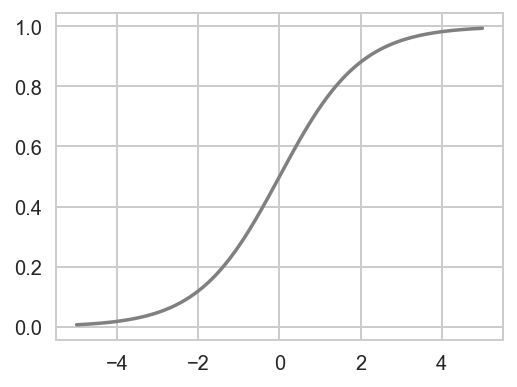

In [139]:
layer = keras.activations.sigmoid
x = tf.linspace(-5, 5, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### Softmax
The [softmax function] is a more generalized form of the sigmoid, it converts data in a row into probabilities (be positive and sum up to $1$), using the formula:

$$\text{Softmax}(x_d)=\frac{\exp{(x_d)}}{\sum_{d=1}^{D}{\exp{(x_d)}}}$$

where $D$ is the number of nodes in a layer. Softmax treats input values as log-odds, and can be used in the last layer of multiclass classification problems.

[softmax function]: https://en.wikipedia.org/wiki/Softmax_function

In [136]:
layer = keras.activations.softmax
x = tf.random.normal(shape=(100,3))
y = layer(x)
y[:10].numpy()

array([[0.6604, 0.1115, 0.2281],
       [0.0924, 0.4246, 0.483 ],
       [0.1463, 0.3795, 0.4742],
       [0.4801, 0.357 , 0.1629],
       [0.4771, 0.3065, 0.2164],
       [0.3281, 0.3926, 0.2793],
       [0.1052, 0.2064, 0.6884],
       [0.3203, 0.5797, 0.1   ],
       [0.2061, 0.2349, 0.5591],
       [0.1831, 0.2805, 0.5364]], dtype=float32)

### Tanh
Hyperbolic tangent (tanh) is another S-shaped function. It outputs values in the interval $(-1,1)$ rather than $(0,1)$ and is zero-centered. Tanh is also rarely used because the domain $(-3,3)$ before the function approaches $-1$ and $1$ is quite small.

$$\text{Tanh}(x)=\frac{{{e^x} - {e^{-x}}}}{{{e^x} + {e^{-x}}}}$$

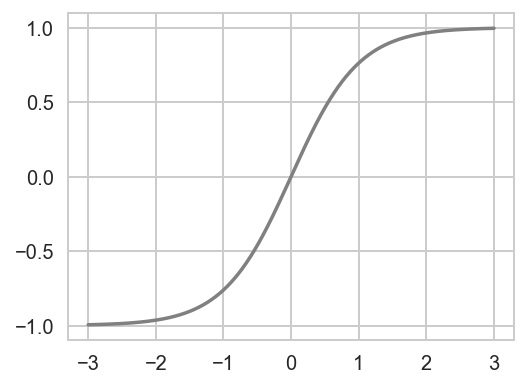

In [157]:
layer = keras.activations.tanh
x = tf.linspace(-3, 3, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### Softsign
Softsign is very much like Tanh, but the domain before approaching boundaries of Softsign is wider than Tanh.

$$\text{Softsign}(x)=\frac{x}{|x|+1}$$

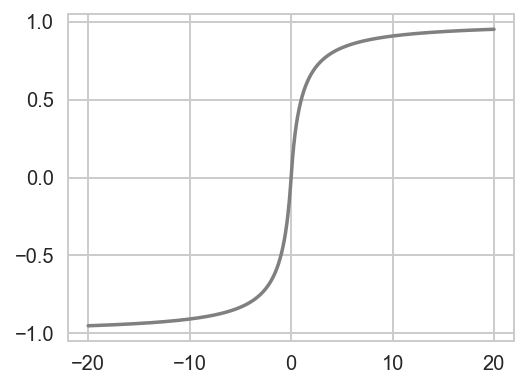

In [152]:
layer = keras.activations.softsign
x = tf.linspace(-20, 20, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### ReLU
[**Re**ctified **L**inear **U**nit] (ReLU)

$$
\text{ReLU}(x)=\max{(0,x)}=
\begin{cases}
    0 &\;\text{if }x<0 \\
    x &\;\text{if }x\geq0 \\
\end{cases}
$$

[**Re**ctified **L**inear **U**nit]: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

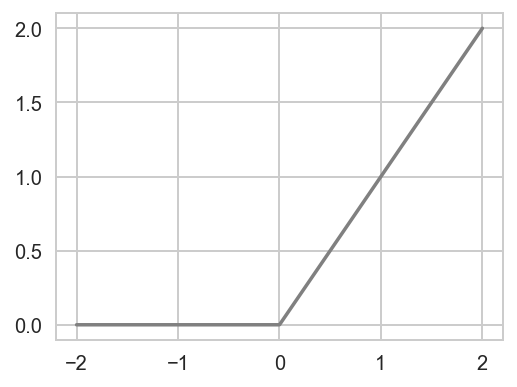

In [173]:
layer = keras.activations.relu
x = tf.linspace(-2, 2, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### LeakyReLU

$$
\text{LeakyReLU}(x)=
\begin{cases}
    \alpha x &\;\text{if }x<0 \\
    x &\;\text{if }x\geq0 \\
\end{cases}
$$


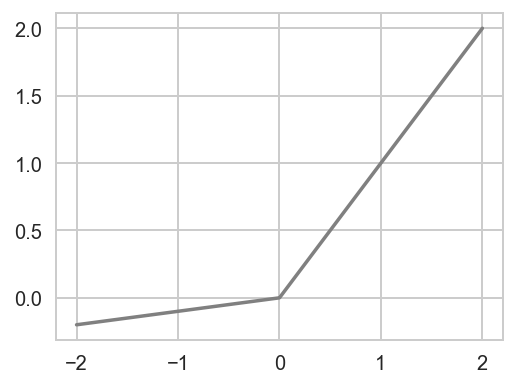

In [172]:
layer = keras.layers.LeakyReLU(alpha=0.1)
x = tf.linspace(-2, 2, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### PReLU
PReLU (**P**arametric **ReLU**) has exactly the same function form as LeakyReLU, but $\alpha$ is *learnable* parameter instead of being a *tunable* hyperparameter.

In [180]:
model = keras.Sequential([
    layers.Input(shape=4),
    layers.Dense(units=6),
    layers.LeakyReLU(),
    layers.Dense(units=6),
    layers.PReLU(),
])

model.compile(loss='categorical_crossentropy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 30        
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6)                 0         
                                                                 
 dense_23 (Dense)            (None, 6)                 42        
                                                                 
 p_re_lu (PReLU)             (None, 6)                 6         
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


### ELU
ELU (**E**xponential **L**inear **U**nit)

$$
\text{ELU}(x)=
\begin{cases}
    \alpha(e^x-1) &\;\text{if }x<0 \\
    x &\;\text{if }x\geq0 \\
\end{cases}
$$

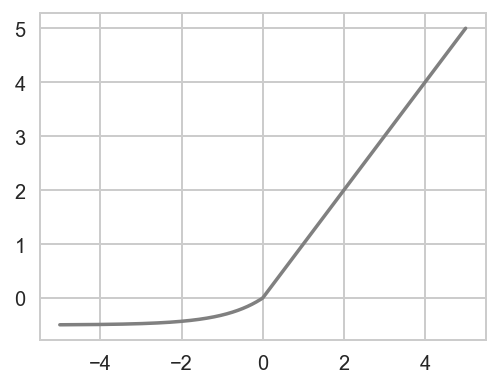

In [179]:
layer = keras.layers.ELU(alpha=0.5)
x = tf.linspace(-5, 5, 1000)
y = layer(x)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, y, 'grey')
plt.show()

### GELU

### Softplus

## 1.3. Backpropagation

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential()
model.add(layers.Dense(units=1))
model.compile(tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
model.build(input_shape=(None,3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [2]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)

In [14]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
normalizer = layers.Normalization(input_shape=(1,), axis=None)
normalizer.adapt(xs)

xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
model1 = keras.Sequential()
# model1.add(normalizer)
model1.add(layers.Dense(units=1))

model1.compile(loss='binary_crossentropy')

model1.fit(xs, ys, validation_split=0.2, epochs=100, verbose=0)
model1.predict(xs)

array([[-0.03436869],
       [ 0.9754254 ],
       [ 1.9852195 ],
       [ 2.9950137 ],
       [ 4.0048075 ],
       [ 5.0146017 ]], dtype=float32)

References
- *cs231n.github.io - [Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/neural-networks-1/)*
- *towardsdatascience.com - [Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)*